# Mathematical Image Analysis Final Project: Dataset Augmentation

## import libraries

In [ ]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

## import sample image

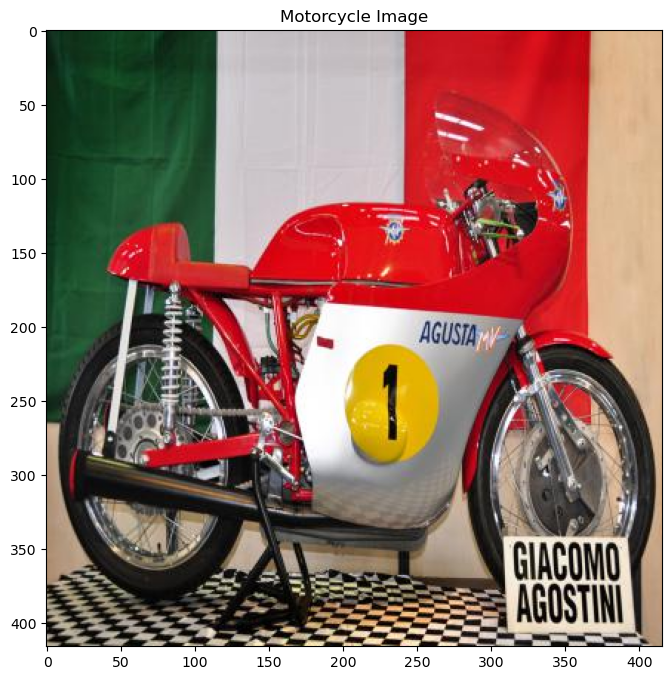

In [ ]:
# Load the image using OpenCV (note: this loads in BGR format)
img = cv2.imread('motorcycle.jpg')
# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title('Motorcycle Image')
plt.axis('on')
plt.show()

# Keep the image for future cells
# Alternative loading with PIL if needed
# img_pil = Image.open('motorcycle.jpg')
# img_array = np.array(img_pil)

# Point operations (I.4):  

In [ ]:
# changing exposure/brightness {brightening (1.5)}


In [ ]:
# contrast enhancement (I.6)


In [ ]:
# enhancing saturation

# converting to black and white

In [ ]:
# Introducing random salt and pepper noise


# Filtering using convolution (I.7, 15)

In [ ]:
# Gaussian Blur (example of weighted averaging filter (I.12))


In [ ]:
# Sharpen the image (I.55-59)


# Other (from linear algebra review):


In [ ]:
# Fixed/Random rotation

In [ ]:
# Shearing; typically padded with 0s (I.9), change in basis

In [ ]:
# Flipping image (reflection) 